# Import Modules

In [131]:
#Import
import numpy as np
import matplotlib.pyplot as plt

# Mandelbrot Set

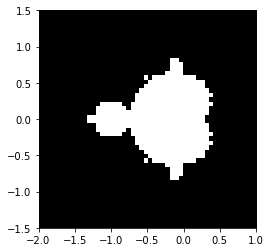

<Figure size 432x288 with 0 Axes>

In [135]:
#Initialize Domain
Left = -2
Right = 1
Bottom = -1.5
Top = 1.5

threshold = 50 #Blowup threshold

#Run sequence until max iteration
N_max = 1000 #Maximum iteration

x,y = np.mgrid[Left:Right:50j, Bottom:Top:50j] #Generate real and imaginary parts on grid.
c = x+1j*y #Create complex numbers on grid
z = x+1j*y #Initialize Sequence

for n in range(N_max):
    # Loop over all grid points of domain
    for i in range(50):
        for j in range(50):
            number = z[i,j]
            #Only update if less than threshold.
            if abs(number) < threshold: 
                z[i,j] = number**2 + c[i,j]

#Create Mask. True iff grid element has modulus less than threshold.
mask = abs(z) < threshold

#Plot Mask
plt.imshow(mask.T, extent=[-2, 1, -1.5, 1.5])
plt.gray()
plt.show()
plt.savefig('mandelbrot.png')

# Markov Chain

In [133]:
#Generate Random Markov Matrix
matrix_size = 5
matrix = np.random.rand(matrix_size, matrix_size)

#Normalize
for i, row in enumerate(matrix):
    matrix[i] = matrix[i] / np.sum(matrix[i])

#Take transpose
matrix_transpose = np.transpose(matrix)
                               
#Generate random p vector
p_vector = np.random.rand(matrix_size)

#Normalize the p_vector
p_vector /= np.sum(p_vector)

#Apply Transition Rule 50 times to p_vector
for i in range(5000):
    p_vector = np.dot(matrix_transpose, p_vector)
    
#Solve for the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix_transpose)
stationary_dist = eigenvectors[:,0] / np.sum(eigenvectors[:,0])

#Calculate l1 normed error
error = np.sum(abs(stationary_dist - p_vector))
if error < 1e-5:
    print("l1 normed difference between stationary distribution and p50 = ", error)

l1 normed difference between stationary distribution and p50 =  3.608224830031759e-16
